In [1]:
# STAT 574 HW1 Problem 2: Card Transaction Data (Python)

#Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from chefboost import Chefboost

In [2]:
# Import data and conduct preprocessing.

card_path = "C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/\
card_transdata.csv"
card_data = pd.read_csv(card_path)
X = card_data.iloc[:,0:7].values
y = card_data.iloc[:,7].values

[Text(0.4444444444444444, 0.9, 'ratio_to_median_purchase_price <= 4.003\ngini = 0.153\nsamples = 1600\nvalue = [1466, 134]'),
 Text(0.2222222222222222, 0.7, 'distance_from_home <= 100.652\ngini = 0.047\nsamples = 1443\nvalue = [1408, 35]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.01\nsamples = 1383\nvalue = [1376, 7]'),
 Text(0.3333333333333333, 0.5, 'used_chip <= 0.5\ngini = 0.498\nsamples = 60\nvalue = [32, 28]'),
 Text(0.2222222222222222, 0.3, 'online_order <= 0.5\ngini = 0.454\nsamples = 43\nvalue = [15.0, 28.0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.291\nsamples = 34\nvalue = [6, 28]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.6666666666666666, 0.7, 'online_order <= 0.5\ngini = 0.466\nsamples = 157\nvalue = [58.0, 99.0]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.142\nsample

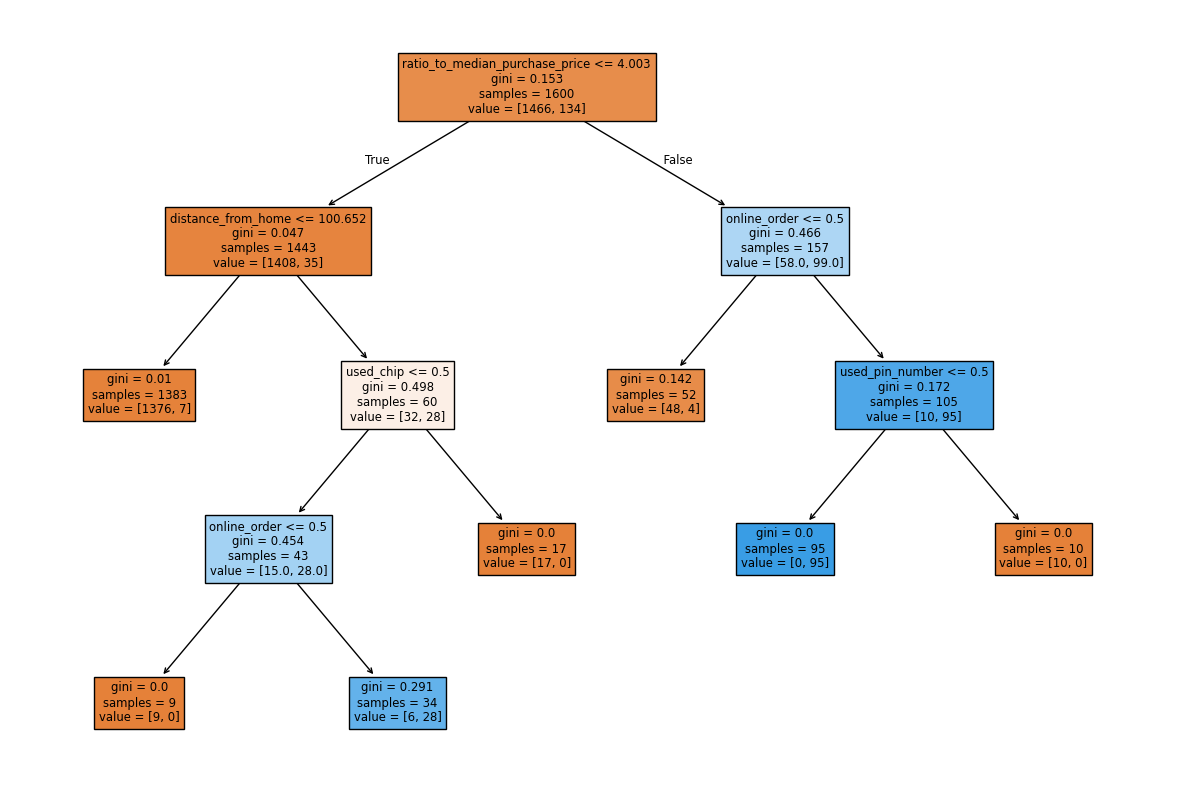

In [3]:
# (a) Spltting the data into 80% training and 20% testing sets. Building
# a classification tree for fraudulent activity using the Gini criterion.
# Pruning tree using the cost-complexity pruning algorithm.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=122470)

# Fitting the binary classification tree with Gini splitting criterion.

gini_tree = DecisionTreeClassifier(max_leaf_nodes=7, criterion='gini',
                                   random_state=590520)
gini_tree_fit = gini_tree.fit(X_train, y_train)

# Plotting fitted tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(gini_tree_fit, feature_names=['distance_from_home',
    'distance_from_last_transaction', 'ratio_to_median_purchase_price',
    'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
    filled=True)

In [4]:
# (b) Compute the prediction accuracy for the training data, using the range
# of classification thresholds between 0.01 and 0.99. What thresholds 
# correspond to the largest prediction accuracy?

def accuracy():
    y_pred = gini_tree_fit.predict_proba(X_test)
    total = len(y_pred)
    trueclassrate = []
    cutoff = []
    for i in range(99):
        tp = 0
        tn = 0
        cutoff.append(0.01*(i+1))
        for sub1, sub2 in zip(y_pred[::,1], y_test):
            tp_ind = 1 if (sub1>0.01*(i+1) and sub2==1) else 0
            tn_ind = 1 if (sub1<0.01*(i+1) and sub2==0) else 0
            tp += tp_ind
            tn += tn_ind
        rate = (tp+tn)/total
        trueclassrate.append(rate)

    df = pd.DataFrame({'trueclassrate': trueclassrate, 'cutoff': cutoff})
    max_rate = max(trueclassrate)
    optimal = df[df['trueclassrate']==max_rate]
    print(optimal)

accuracy()

    trueclassrate  cutoff
7            0.99    0.08
8            0.99    0.09
9            0.99    0.10
10           0.99    0.11
11           0.99    0.12
..            ...     ...
77           0.99    0.78
78           0.99    0.79
79           0.99    0.80
80           0.99    0.81
81           0.99    0.82

[75 rows x 2 columns]


    trueclassrate  cutoff
7          0.9825    0.08
8          0.9825    0.09
9          0.9825    0.10
10         0.9825    0.11
11         0.9825    0.12
12         0.9825    0.13
13         0.9825    0.14
14         0.9825    0.15
15         0.9825    0.16
16         0.9825    0.17
17         0.9825    0.18
18         0.9825    0.19
19         0.9825    0.20
20         0.9825    0.21
21         0.9825    0.22
22         0.9825    0.23
23         0.9825    0.24
24         0.9825    0.25
25         0.9825    0.26
26         0.9825    0.27
27         0.9825    0.28
28         0.9825    0.29
29         0.9825    0.30
30         0.9825    0.31
31         0.9825    0.32
32         0.9825    0.33
33         0.9825    0.34
34         0.9825    0.35
35         0.9825    0.36
36         0.9825    0.37
37         0.9825    0.38
38         0.9825    0.39
39         0.9825    0.40
40         0.9825    0.41
41         0.9825    0.42
42         0.9825    0.43
43         0.9825    0.44
44         0

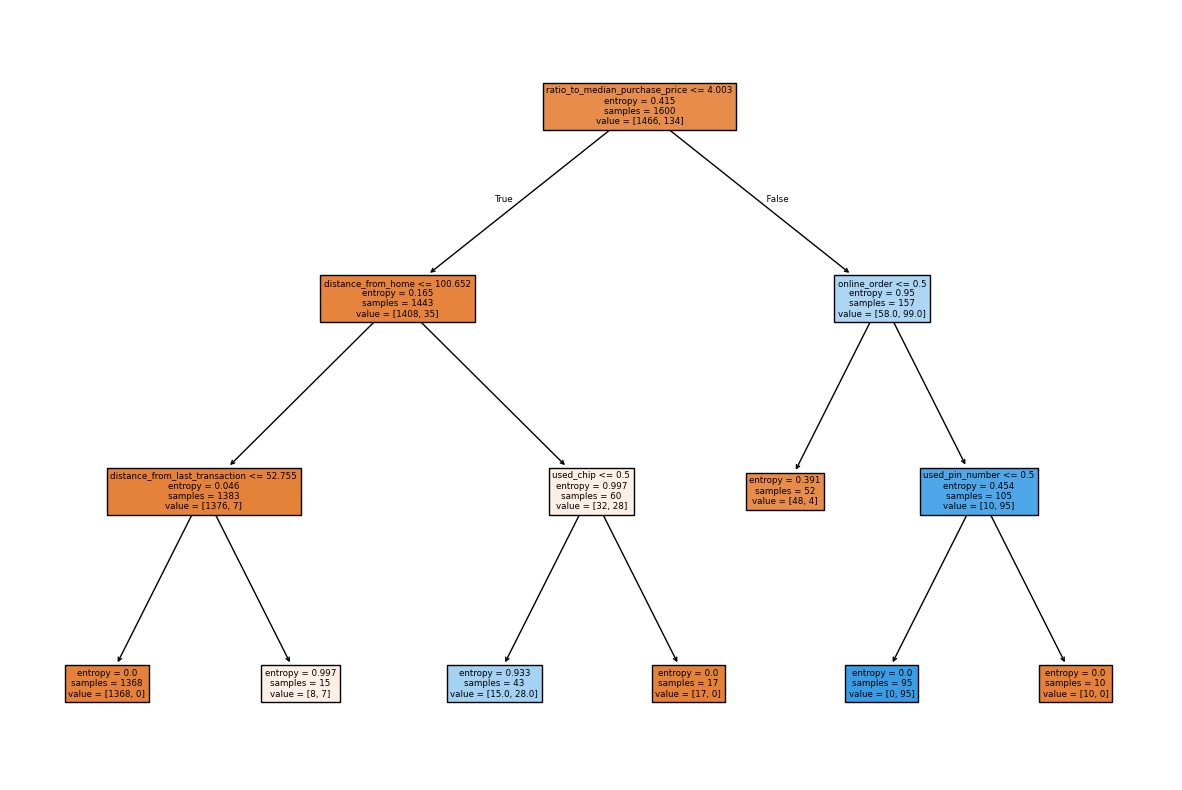

In [5]:
# (c) Fitting binary tree using Entropy Splitting Criterion and 
# cost-complexity pruning algorithm

entropy_tree = DecisionTreeClassifier(max_leaf_nodes=7, criterion='entropy',
                                   random_state=590520)
entropy_tree_fit = entropy_tree.fit(X_train, y_train)

# Plotting fitted tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(entropy_tree_fit, feature_names=['distance_from_home',
    'distance_from_last_transaction', 'ratio_to_median_purchase_price',
    'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
    filled=True)

#(d) Computing the prediction accuracy of the entropy tree for the training
# data, using the cutoffs for the predicted probability of fraud ranging
# between 0.01 and 0.99. List the cutoffs that give the maximum prediction
# accuracy. 

def accuracy2():
    y_pred2 = entropy_tree_fit.predict_proba(X_test)
    total2 = len(y_pred2)
    trueclassrate2 = []
    cutoff2 = []
    for i in range(99):
        tp = 0
        tn = 0
        cutoff2.append(0.01*(i+1))
        for sub1, sub2 in zip(y_pred2[::,1], y_test):
            tp_ind = 1 if (sub1>0.01*(i+1) and sub2==1) else 0
            tn_ind = 1 if (sub1<0.01*(i+1) and sub2==0) else 0
            tp += tp_ind
            tn += tn_ind
        rate2 = (tp+tn)/total2
        trueclassrate2.append(rate2)

    df = pd.DataFrame({'trueclassrate': trueclassrate2, 'cutoff': cutoff2})
    max_rate2 = max(trueclassrate2)
    optimal2 = df[df['trueclassrate']==max_rate2]
    print(optimal2)

accuracy2()

In [6]:
# (e) Fitting binary classification tree using CHAID criterion and cost-
# complexity pruning algorithm.

transaction = pd.read_csv(card_path)
fraud_code = {1: 'fraud', 0: 'not fraud'}
transaction['fraud'] = transaction['fraud'].map(fraud_code)
X = transaction.iloc[:,0:7].values
y = transaction.iloc[:,7].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=868692)
X_train = pd.DataFrame(X_train, columns=['distance_from_home',
    'distance_from_last_transaction', 'ratio_to_median_purchase_price',
    'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'])

y_train = pd.DataFrame(y_train, columns=['fraud'])
train_data = pd.concat([X_train, y_train], axis=1)

config = {'algorithm': 'CHAID', 'max_depth': 7}
tree_chaid = Chefboost.fit(train_data, config, target_label='fraud')

25-02-11 16:20:55 - CHAID tree is going to be built...
25-02-11 16:21:01 - -------------------------
25-02-11 16:21:01 - finished in 6.514265298843384 seconds
25-02-11 16:21:02 - -------------------------
25-02-11 16:21:02 - Evaluate train set
25-02-11 16:21:02 - -------------------------
25-02-11 16:21:02 - Accuracy: 99.0625% on 1600 instances
25-02-11 16:21:02 - Labels: ['not fraud' 'fraud']
25-02-11 16:21:02 - Confusion matrix: [[1459, 14], [1, 126]]
25-02-11 16:21:02 - Precision: 99.0496%, Recall: 99.9315%, F1: 99.4886%


In [7]:
#(f) Computing the prediction accuracy of the CHAID tree for the training
# data, using the cutoffs for the predicted probability of fraud ranging
# between 0.01 and 0.99. List the cutoffs that give the maximum prediction
# accuracy.

transaction = pd.read_csv(card_path)

X = transaction.iloc[:,0:7].values
y = transaction.iloc[:,7].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=868692)
X_train = pd.DataFrame(X_train, columns=['distance_from_home',
    'distance_from_last_transaction', 'ratio_to_median_purchase_price',
    'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'])

y_train = pd.DataFrame(y_train, columns=['fraud'])
train_data = pd.concat([X_train, y_train], axis=1)

config = {'algorithm': 'CHAID', 'max_depth': 7}
tree_chaid = Chefboost.fit(train_data, config, target_label='fraud')

X_test = pd.DataFrame(X_test, columns=['distance_from_home',
    'distance_from_last_transaction', 'ratio_to_median_purchase_price',
    'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'])

def accuracy3():
    y_pred3 = []
    for i in range(len(y_test)):
        y_pred3.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))
    total3 = len(y_pred3)
    trueclassrate3 = []
    cutoff3 = []
    for i in range(99):
        tp = 0
        tn = 0
        cutoff3.append(0.01*(i+1))
        for sub1, sub2 in zip(y_pred3, y_test):
            tp_ind = 1 if (float(sub1)>0.01*(i+1) and sub2==1) else 0
            tn_ind = 1 if (float(sub1)<0.01*(i+1) and sub2==0) else 0
            tp += tp_ind
            tn += tn_ind
        rate3 = (tp+tn)/total3
        trueclassrate3.append(rate3)

    df = pd.DataFrame({'trueclassrate': trueclassrate3, 'cutoff': cutoff3})
    max_rate3 = max(trueclassrate3)
    optimal3 = df[df['trueclassrate']==max_rate3]
    print(optimal3)

accuracy3()

25-02-11 16:21:02 - ⚠️ You set the algorithm to CHAID but the Decision column of your data set has non-object type.That's why, the algorithm is set to Regression to handle the data set.
25-02-11 16:21:02 - Regression tree is going to be built...
25-02-11 16:21:07 - -------------------------
25-02-11 16:21:07 - finished in 5.725178241729736 seconds
25-02-11 16:21:08 - -------------------------
25-02-11 16:21:08 - Evaluate train set
25-02-11 16:21:08 - -------------------------
25-02-11 16:21:08 - MAE: 0.0078125
25-02-11 16:21:08 - MSE: 0.00703125
25-02-11 16:21:08 - RMSE: 0.08385254915624211
25-02-11 16:21:08 - RAE: 0.2834733547569204
25-02-11 16:21:08 - RRSE 0.296753470593349
25-02-11 16:21:08 - Mean: 0.0875
25-02-11 16:21:08 - MAE / Mean: 8.928571428571429%
25-02-11 16:21:08 - RMSE / Mean: 95.83148474999099%


c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[2]<=3.9026644831596053:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0]<=84.76089848738398:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

    trueclassrate  cutoff
0            0.99    0.01
1            0.99    0.02
2            0.99    0.03
3            0.99    0.04
4            0.99    0.05
..            ...     ...
94           0.99    0.95
95           0.99    0.96
96           0.99    0.97
97           0.99    0.98
98           0.99    0.99

[99 rows x 2 columns]
